<a href="https://colab.research.google.com/github/LCCAbraham/ICD-2023/blob/main/ICD_Proyecto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Predicción de abanono escolar con Redes Bayesianas.**

Abraham Cisneros Valladolid

Proyecto final ICD-2023


#Introducción

La deserción escolar es un fenómeno global que afecta a millones de estudiantes en todo el mundo, con consecuencias significativas para los individuos y la sociedad en general.

Este problema se manifiesta cuando los estudiantes dejan la educación formal antes de completar su formación básica o secundaria. Las razones detrás de la deserción escolar son diversas y pueden incluir factores económicos, sociales, familiares y académicos.

Este fenómeno no solo limita las oportunidades individuales, sino que también contribuye a la perpetuación de la desigualdad social y económica. A nivel mundial, los esfuerzos para abordar este problema se centran en comprender y abordar sus causas subyacentes, así como en desarrollar políticas y programas educativos que fomenten la retención y el éxito académico de todos los estudiantes.

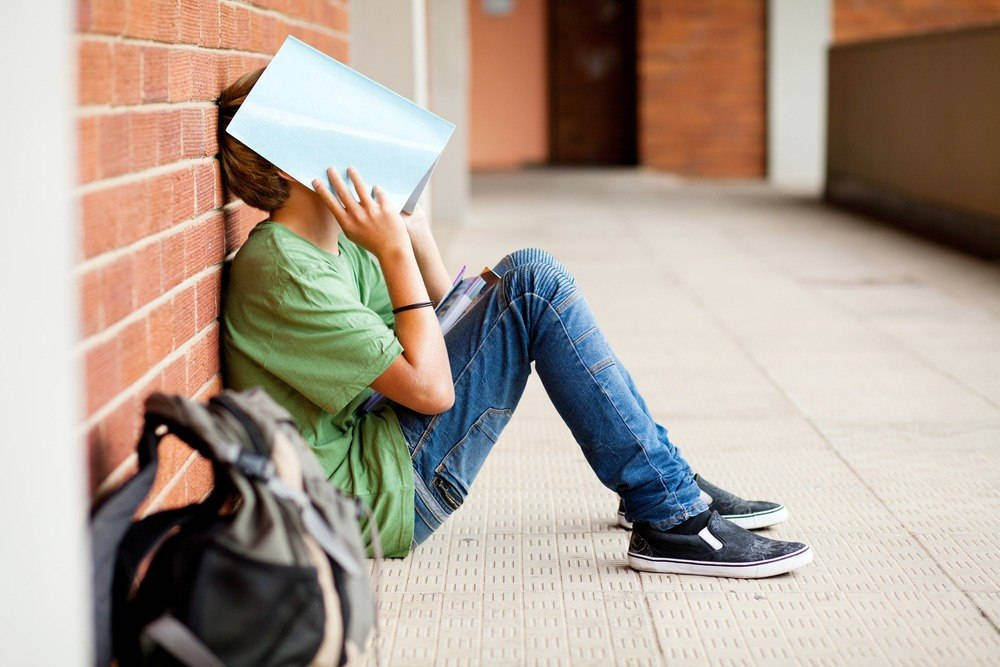

Es por ello que se buscan alternativas para abordar este fenómeno; una de ellas es el uso de modelos de aprendizaje automático que permitan a los tutores y asesores comprender mejor los patrones de los estudiantes que abandonan sus estudios.

Esto facilitaría intervenir y proporcionarles la ayuda necesaria para prevenir que esto ocurra.

Para realizar esta tarea se busca aplicar modelos que sean interpretables para tomar una mejor decisión al respecto.

De este modo se propone usar un modelo de redes bayesianas. Una red bayesiana es un modelo gráfico probabilístico que representa las relaciones entre diferentes variables mediante un grafo dirigido acíclico. Cada nodo en el grafo representa una variable, y las aristas indican las dependencias probabilísticas entre ellas. Está basada en el teorema de Bayes, que describe cómo se actualizan las creencias sobre una variable dado el conocimiento de otras variables relacionadas.

Las redes bayesianas son buenas para modelos interpretables por varias razones. Primero, visualizan de manera clara las relaciones causales entre variables, lo que facilita la comprensión de cómo cambios en una variable afectan a otras. Además, permiten la incorporación de conocimientos expertos y evidencia empírica de una manera sistemática. También son efectivas para manejar la incertidumbre al modelar probabilidades y actualizar creencias a medida que se obtienen más datos.

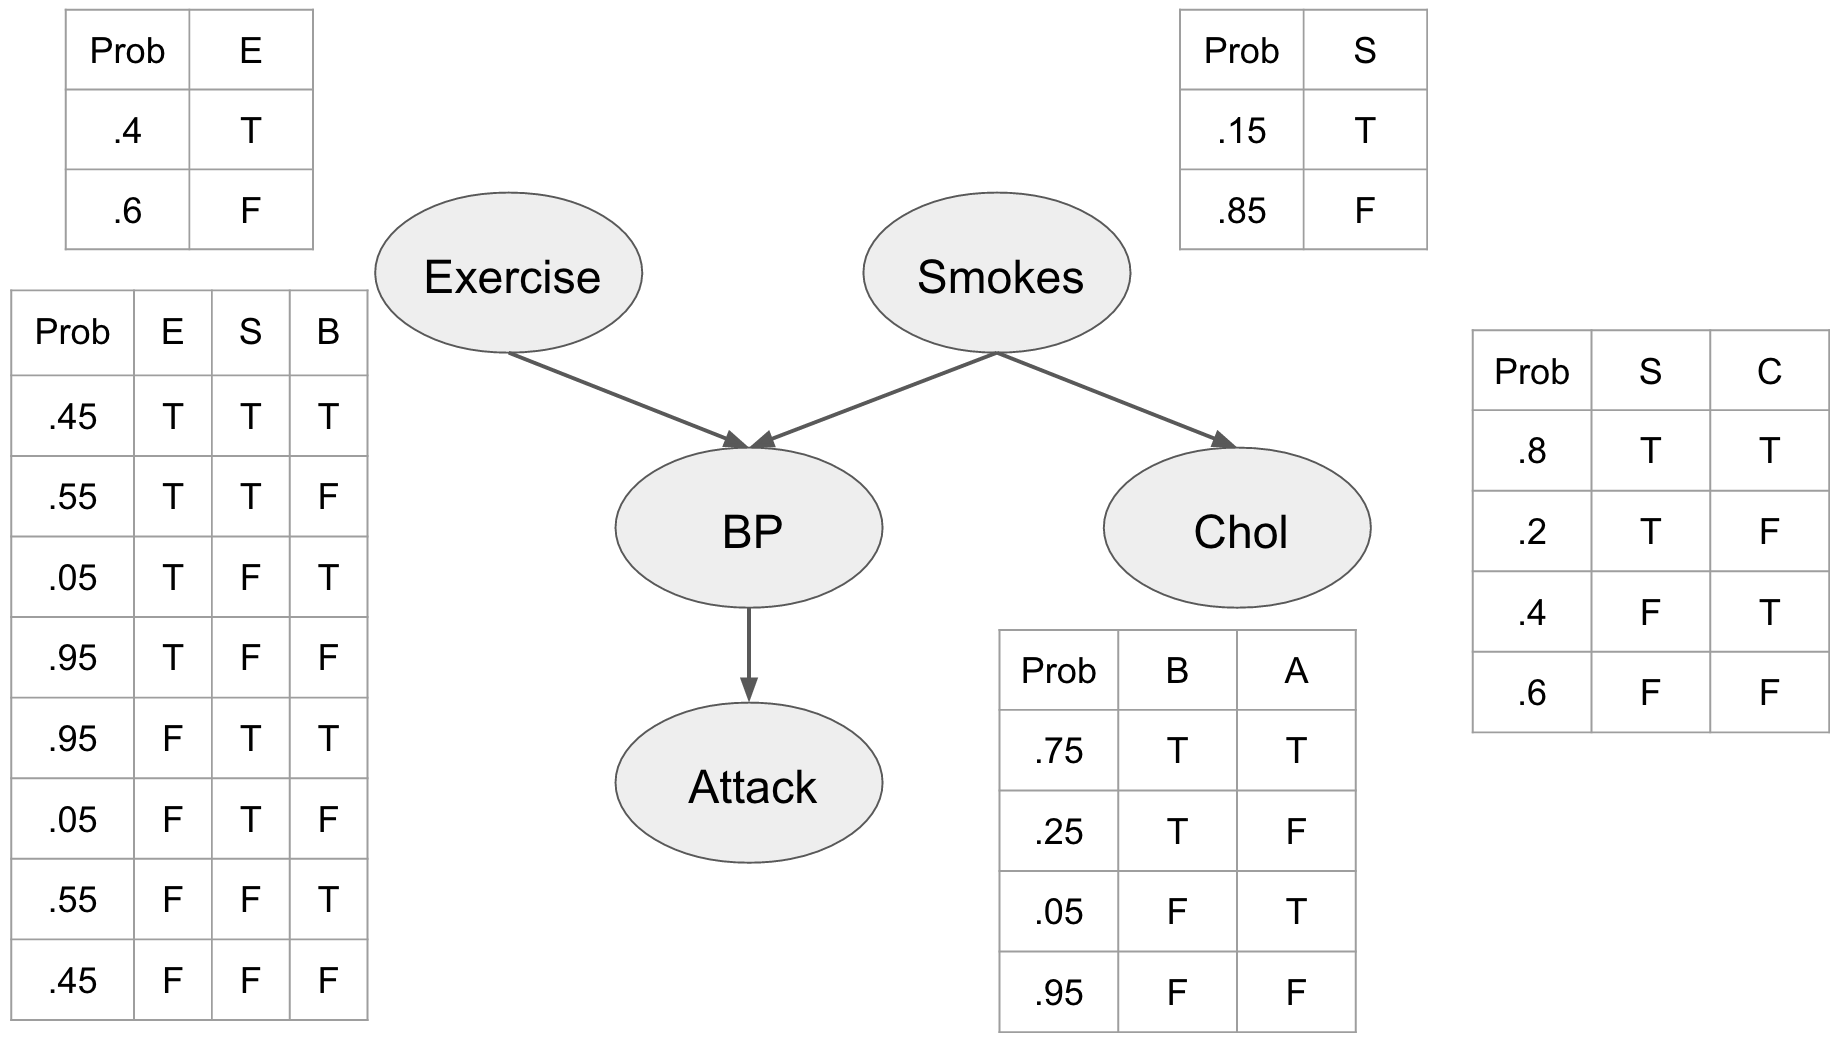

*Ejemplo de una red bayesiana*

#Datos


Los datos fueron obtenidos de una base de datos pública en Kaggle.

Liga de la base de datos: https://www.kaggle.com/datasets/ranzeet013/student-graduation-dataset/data

Al mismo tiempo, esta base de datos no tiene la interpretación de algunos valores, es por ello que se dio a la tarea de encontrar la fuente de información. Se adjunta el documento científico de los datos.

Liga del documento: https://www.mdpi.com/2306-5729/7/11/146

##Importar los datos.

In [ ]:
import pandas as pd
url="https://drive.google.com/file/d/1AojXHS9Z5ZU0QTtNi1yBQVL3hy0cyaDX/view?usp=drive_link"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
df

Marital status  Application mode  Application order  Course  \
0                  1                 8                  5       2   
1                  1                 6                  1      11   
2                  1                 1                  5       5   
3                  1                 8                  2      15   
4                  2                12                  1       3   
...              ...               ...                ...     ...   
4419               1                 1                  6      15   
4420               1                 1                  2      15   
4421               1                 1                  1      12   
4422               1                 1                  1       9   
4423               1                 5                  1      15   

      Daytime/evening attendance  Previous qualification  Nacionality  \
0                              1                       1            1   
1                              1                       1            1   
2                              1                       1            1   
3                              1                       1            1   
4                              0                       1            1   
...                          ...                     ...          ...   
4419                           1                       1            1   
4420                           1                       1           19   
4421                           1                       1            1   
4422                           1                       1            1   
4423                           1                       1            9   

      Mother's qualification  Father's qualification  Mother's occupation  \
0                         13                      10                    6   
1                          1                       3                    4   
2                         22                      27                   10   
3                         23                      27                    6   
4                         22                      28                   10   
...                      ...                     ...                  ...   
4419                       1                       1                    6   
4420                       1                       1                   10   
4421                      22                      27                   10   
4422                      22                      27                    8   
4423                      23                      27                    6   

      ...  Curricular units 2nd sem (credited)  \
0     ...                                    0   
1     ...                                    0   
2     ...                                    0   
3     ...                                    0   
4     ...                                    0   
...   ...                                  ...   
4419  ...                                    0   
4420  ...                                    0   
4421  ...                                    0   
4422  ...                                    0   
4423  ...                                    0   

      Curricular units 2nd sem (enrolled)  \
0                                       0   
1                                       6   
2                                       6   
3                                       6   
4                                       6   
...                                   ...   
4419                                    6   
4420                                    6   
4421                                    8   
4422                                    5   
4423                                    6   

      Curricular units 2nd sem (evaluations)  \
0                                          0   
1                                          6   
2                                          0   
3                                        

#Limpieza de datos

Los datos al ser descargados de una fuente confiable, usualmente se encuentran ya limpios los datos, sin embargo, es requerido comprobar dicha afirmación.

In [ ]:
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4419    False
4420    False
4421    False
4422    False
4423    False
Length: 4424, dtype: bool

Con estos 3 comandos ejecutados, podemos confirmar que los datos se encuentran limpios.

#Exploración de los datos

*Algunas de las imágenes fueron obtenidas del documento científico citado.*

La variable objetivo de este conjunto de datos es "Target" la cual consta de 3 valores.



1.   Graduate (Graduado)
2.   Enrolled (Inscrito)
3.   Dropout  (Deserción)



##Distribución respecto a la variable objetivo


Nuestro objetivo es tratar con los estudiantes que abandonan sus estudios, es por ello que usar esta variable como medio de comparación es de suma utilidad.

Observermos como estan distribuidas las instancias.

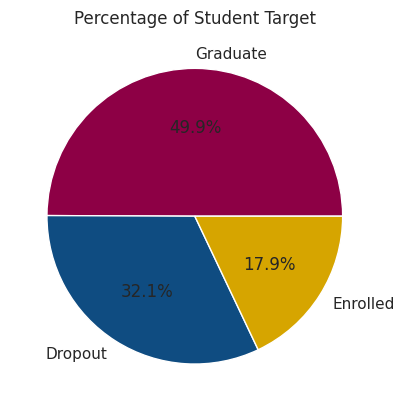

In [ ]:
#Importamos librerias
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Establecemos tema
sns.set(style="darkgrid")
palette = ["#8d0045", "#0f4c81", "#d6a500" ]
sns.set_palette(palette)

#Seleccionamos la informacion
student_target = df['Target'].value_counts()

#Establecemos grafico
plt.pie(student_target, labels=student_target.index, autopct='%1.1f%%')
#Establecemos titulo
plt.title('Percentage of Student Target')
plt.show()

La mitad de los estudiantes ya se graduaron, un 32% desertaron sus estudios, mientras que un 18% aún continúan sus estudios.

*Gráfico de los cursos con distribución respecto a la variable objetivo.*

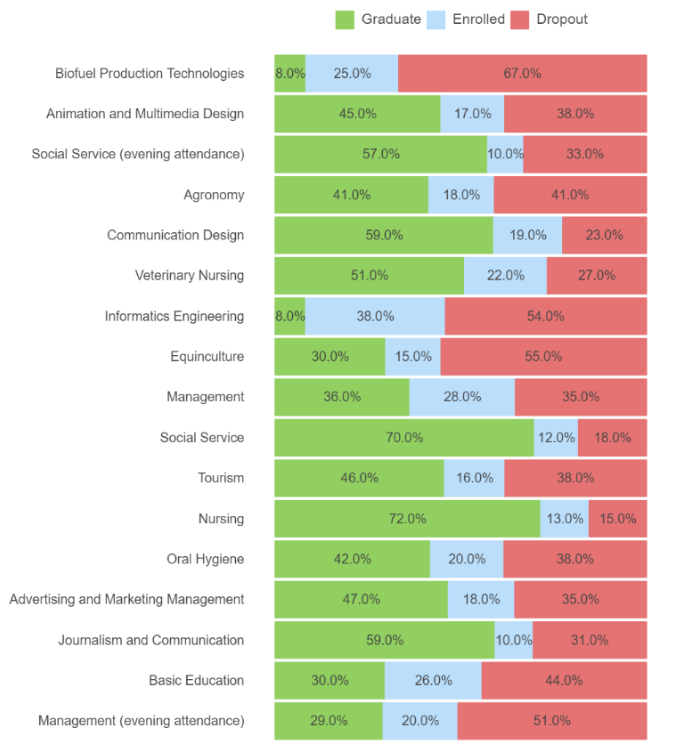

Lo que se puede observar es que hay ciertos cursos que tienen un mayor porcentaje de abandono *Dropout* que otros.

Por ejemplo:

*   Biofuel Production Tech - 67%
*   Informatics Eng - 54%
*   Equinculutre - 55%
*   Management -   51%


Esto solo nos da una pequeña perspectiva del problema, pues algunos cursos presentan mayor dificultad para terminarlos que otros.

Sin embargo, estos datos pueden significar solo un hecho más no una relación directa.


*Gráfico de los atribuos con distribución respecto a la variable objetivo.*

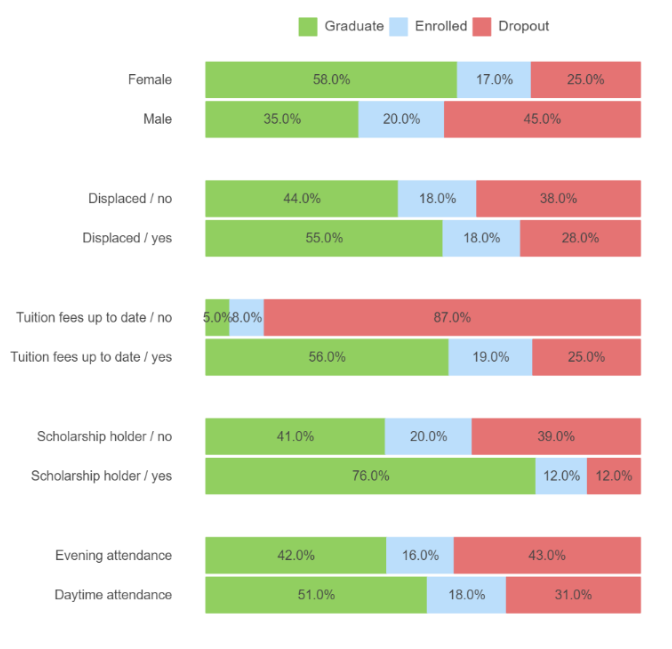

De los atributos anteriores a destacar están el género (*Male y Female*) e inscripción actualizada (*Tuition fees up to date, yes y no*).

Comenzando por abordar la cuestión de género, se evidencia que la tasa de deserción en hombres es un 45%, significativamente superior al 25% observado en mujeres. Del mismo modo la tasa de graduación en las mujeres es un 58%, consdierablemente superior al 35% observado en hombres.

Ahora, veamos la cantidad de estudiantes que se graduaron, abandonaron y continúan con sus estudios.

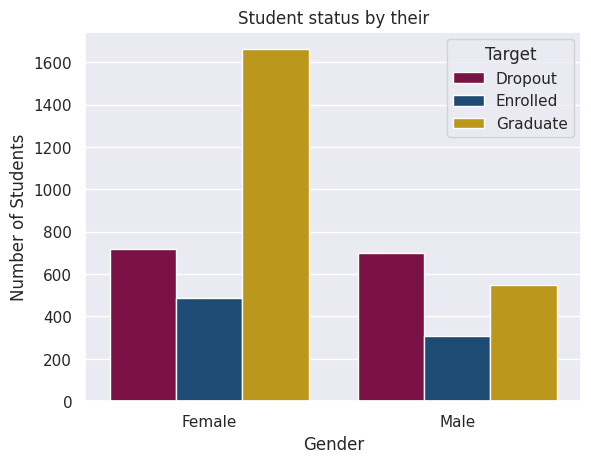

In [ ]:
#Establecemos grafico
sns.countplot(data=df, x='Gender', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])
#Establecemos los ticks del grafico
plt.xticks(ticks=[0,1], labels=['Female','Male'])
#Establecemos leyendas
plt.ylabel('Number of Students')
#Establecemos titulo
plt.title('Student status by their')
plt.show()

Dados los datos, hay una mayor tasa de graduados para las mujeres, pero también son las que más deserciones tiene, aunque es bastante similar a la cantidad de desertores masculinos.

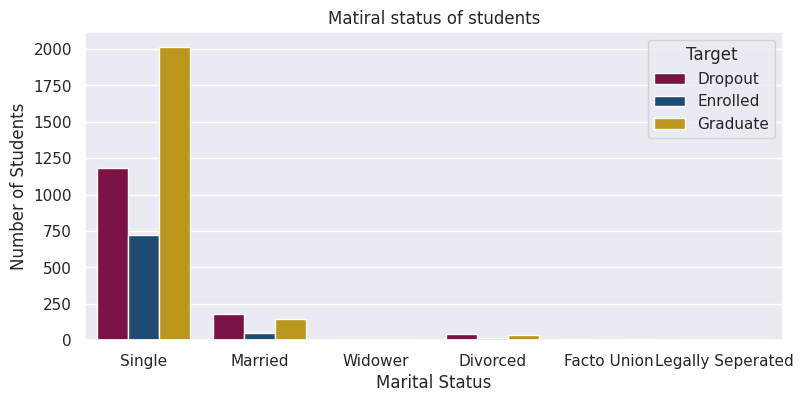

In [ ]:
#Tamaño de la figura
plt.figure(figsize=(9,4))
#Establecemos el grafico
sns.countplot(data=df, x='Marital status', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])
#Establecemos los ticks para la grafica
plt.xticks(ticks=[0,1,2,3,4,5], labels=['Single','Married','Widower','Divorced','Facto Union','Legally Seperated'])
#Leyendas
plt.xlabel('Marital Status')
plt.ylabel('Number of Students')
plt.title("Matiral status of students")
plt.show()

La mayor parte de los solteros tienen la tasa de graduados y desertores más grande.

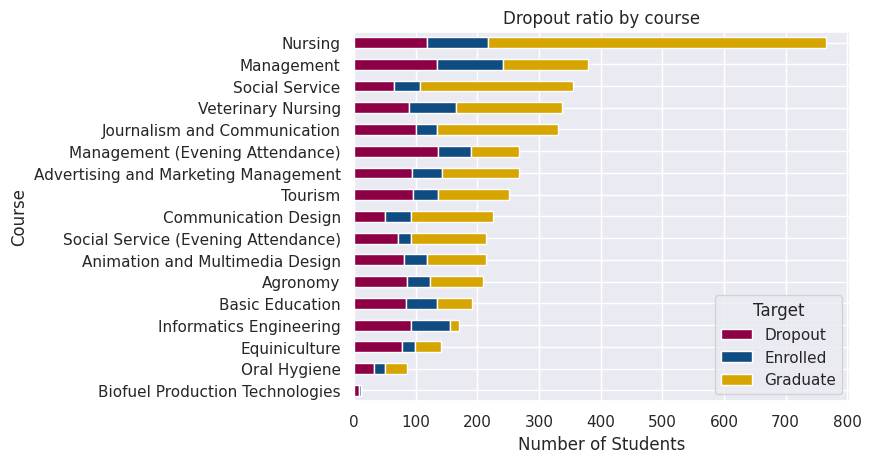

In [ ]:
#Agrupamos la informacion
student_course = df.groupby(['Course', 'Target']).size().reset_index().pivot(columns='Target', index='Course', values=0)

#Renombramos los atributos
student_course = student_course.rename(index={1:'Biofuel Production Technologies',2:'Animation and Multimedia Design',3:'Social Service (Evening Attendance)',4:'Agronomy',5:'Communication Design',6:'Veterinary Nursing',7:'Informatics Engineering',8:'Equiniculture',9:'Management',10:'Social Service',11:'Tourism',12:'Nursing',13:'Oral Hygiene',14:'Advertising and Marketing Management',15:'Journalism and Communication',16:'Basic Education',17:'Management (Evening Attendance)'})

#Calculos necesarios
student_course_total = student_course.sum(axis=1)
student_course_sorted = student_course_total.sort_values(ascending=True)
student_course.loc[student_course_sorted.index].plot(kind='barh', stacked=True)

#Leyendas
plt.xlabel('Number of Students')
plt.title("Dropout ratio by course")
plt.show()

El cursp que tiene la mayor cantidad de graduados es *Nursing*, mientras que *Management* tiene la mayor tasa de abandono.

##Edad de ingreso


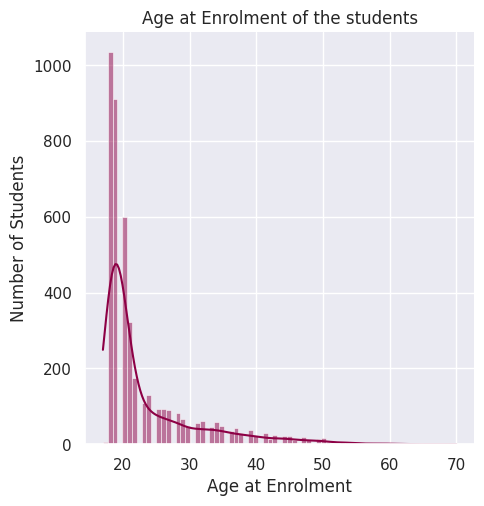

In [ ]:
#Establecemos grafico
sns.displot(data=df, x='Age at enrollment', kde=True)
df['Age at enrollment'].describe()

#Leyendas
plt.xlabel('Age at Enrolment')
plt.ylabel('Number of Students')
plt.title("Age at Enrolment of the students")
plt.show()

La distribución esta sesgada a la izquierda, indicando que la mayoria de los alumnos que ingresan son jovenes, dando como promedio de edad los 23 años.

##Socioeconómico

Veamos como se agrupan las ocupaciones de los padres y madres de los estudiantes respecto a la variable objetivo.

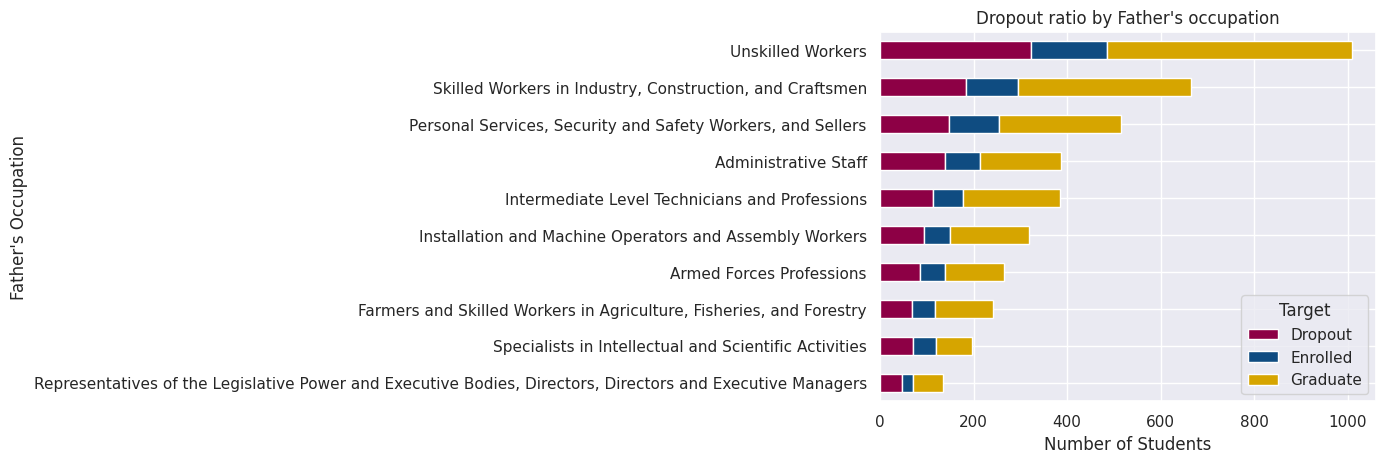

In [ ]:
#Agrupamiento y renombramiento a los atributos para explicabilidad
student_foccupation = df.groupby(["Father's occupation", 'Target']).size().reset_index().pivot(columns='Target', index="Father's occupation", values=0)
student_foccupation = student_foccupation.rename(index={1:'Student',2:'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',3:'Specialists in Intellectual and Scientific Activities',4:'Intermediate Level Technicians and Professions',5:'Administrative Staff',6:'Personal Services, Security and Safety Workers, and Sellers',7:'Farmers and Skilled Workers in Agriculture, Fisheries, and Forestry',8:'Skilled Workers in Industry, Construction, and Craftsmen',9:'Installation and Machine Operators and Assembly Workers',10:'Unskilled Workers',11:'Armed Forces Professions',12:'Other Situation',13:'(blank)',14:'Armed Forces Officers',15:'Armed Forces Sergeants',16:'Other Armed Forces personnel',17:'Directors of Administrative and Commercial Services',18:'Hotel, Catering, Trade, and Other Services Directors',19:'Specialists in the Physical Sciences, Mathematics, Engineering, and Related Techniques',20:'Health Professionals',21:'Teachers',22:'Specialists in Finance, Accounting, Administrative Organization, and Public and Commercial relations',23:'Intermediate Level Science and Engineering Technicians and Professions',24:'Technicians and Professionals of Intermediate Level of Health',25:'Intermediate Level Technicians from Legal, Social, Sports, Cultural, and Similar Services',26:'Information and Communication Technology Technicians',27:'Office Workers, Secretaries in General, and Data Processing Operators',28:'Data, Accounting, Statistical, Financial Services, and Registry-related Operators',29:'Other Administrative Support Staff',30:'Personal Service Workers',31:'Sellers',32:'Personal Care workers and The Like',33:'Protection and Security Services Personnel',34:'Market-oriented Farmers and Skilled Agricultural and Animal Production Workers',35:'Farmers, Livestock Keepers, Fishermen, Hunters and Gatherers, and Subsistence',36:'Skilled Construction Workers and The Like, except Electricians',37:'Skilled Workers in Metallurgy, Metalworking, and Similar',38:'Skilled workers in Electricity and Electronics',39:'Workers in Food Processing, Woodworking, and Clothing and Other industries and Crafts',40:'Fixed Plant and Machine Operators',41:'Assembly Workers',42:'Vehicle Drivers and Mobile Equipment Operators',43:'Unskilled Workers in Agriculture, Animal Production, and Fisheries and Forestry',44:'Unskilled Workers in Extractive Industry, Construction, Manufacturing, and Transport',45:'Meal Preparation Assistants',46:'Street Vendors (except food) and Street Service Providers'})

#Configuraciones
student_foccupation_total = student_foccupation.sum(axis=1)
student_foccupation_sorted = student_foccupation_total.sort_values(ascending=True)
student_foccupation_top10 = student_foccupation_sorted[36:]
student_foccupation.loc[student_foccupation_top10.index].plot(kind='barh', stacked=True)

#Leyendas
plt.xlabel('Number of Students')
plt.ylabel("Father's Occupation")
plt.title("Dropout ratio by Father's occupation")
plt.show()

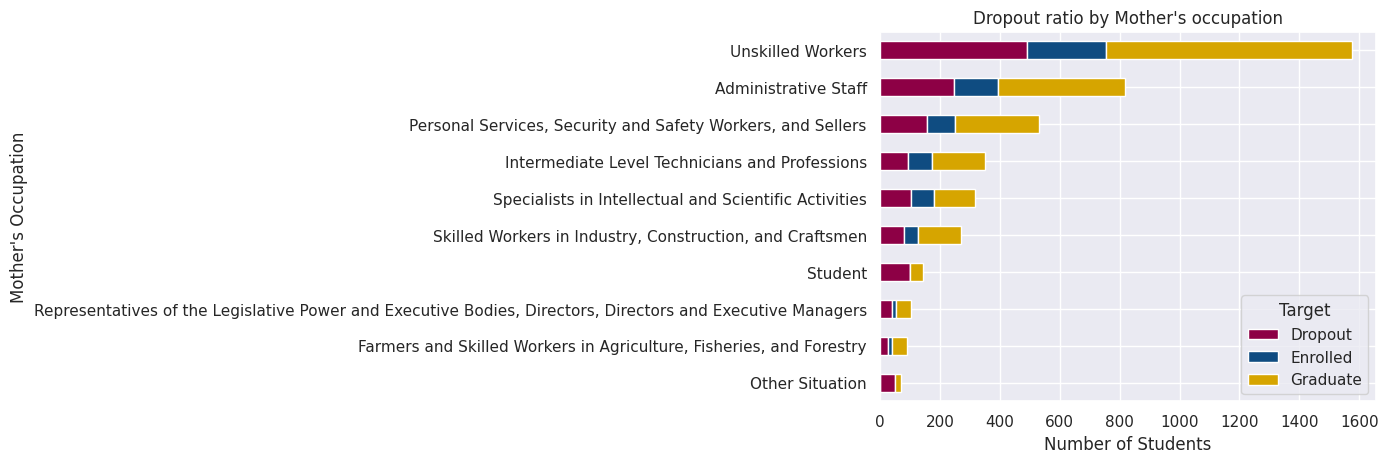

In [ ]:
#Agrupamiento y renombramiento a los atributos para explicabilidad
student_moccupation = df.groupby(["Mother's occupation", 'Target']).size().reset_index().pivot(columns='Target', index="Mother's occupation", values=0)
student_moccupation = student_moccupation.rename(index={1:'Student',2:'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',3:'Specialists in Intellectual and Scientific Activities',4:'Intermediate Level Technicians and Professions',5:'Administrative Staff',6:'Personal Services, Security and Safety Workers, and Sellers',7:'Farmers and Skilled Workers in Agriculture, Fisheries, and Forestry',8:'Skilled Workers in Industry, Construction, and Craftsmen',9:'Installation and Machine Operators and Assembly Workers',10:'Unskilled Workers',11:'Armed Forces Professions',12:'Other Situation',13:'(blank)',14:'Armed Forces Officers',15:'Armed Forces Sergeants',16:'Other Armed Forces personnel',17:'Directors of Administrative and Commercial Services',18:'Hotel, Catering, Trade, and Other Services Directors',19:'Specialists in the Physical Sciences, Mathematics, Engineering, and Related Techniques',20:'Health Professionals',21:'Teachers',22:'Specialists in Finance, Accounting, Administrative Organization, and Public and Commercial relations',23:'Intermediate Level Science and Engineering Technicians and Professions',24:'Technicians and Professionals of Intermediate Level of Health',25:'Intermediate Level Technicians from Legal, Social, Sports, Cultural, and Similar Services',26:'Information and Communication Technology Technicians',27:'Office Workers, Secretaries in General, and Data Processing Operators',28:'Data, Accounting, Statistical, Financial Services, and Registry-related Operators',29:'Other Administrative Support Staff',30:'Personal Service Workers',31:'Sellers',32:'Personal Care workers and The Like',33:'Protection and Security Services Personnel',34:'Market-oriented Farmers and Skilled Agricultural and Animal Production Workers',35:'Farmers, Livestock Keepers, Fishermen, Hunters and Gatherers, and Subsistence',36:'Skilled Construction Workers and The Like, except Electricians',37:'Skilled Workers in Metallurgy, Metalworking, and Similar',38:'Skilled workers in Electricity and Electronics',39:'Workers in Food Processing, Woodworking, and Clothing and Other industries and Crafts',40:'Fixed Plant and Machine Operators',41:'Assembly Workers',42:'Vehicle Drivers and Mobile Equipment Operators',43:'Unskilled Workers in Agriculture, Animal Production, and Fisheries and Forestry',44:'Unskilled Workers in Extractive Industry, Construction, Manufacturing, and Transport',45:'Meal Preparation Assistants',46:'Street Vendors (except food) and Street Service Providers'})

#Configuraciones
student_moccupation_total = student_moccupation.sum(axis=1)
student_moccupation_sorted = student_moccupation_total.sort_values(ascending=True)
student_moccupation_top10 = student_moccupation_sorted[22:]
student_moccupation.loc[student_moccupation_top10.index].plot(kind='barh', stacked=True)

#Leyendas
plt.xlabel('Number of Students')
plt.ylabel("Mother's Occupation")
plt.title("Dropout ratio by Mother's occupation")
plt.show()

En ambas gráficas se puede observar que "unskilled workers" tienen la mayor tasa de graduados y abandono. Esto puede determinar la nula relación entre la deserción escolar y a lo que se dedican los padres.

##Correlación entre atributos y la variable objetivo.

<Axes: title={'center': 'Correlation Heatmap between Variables'}>

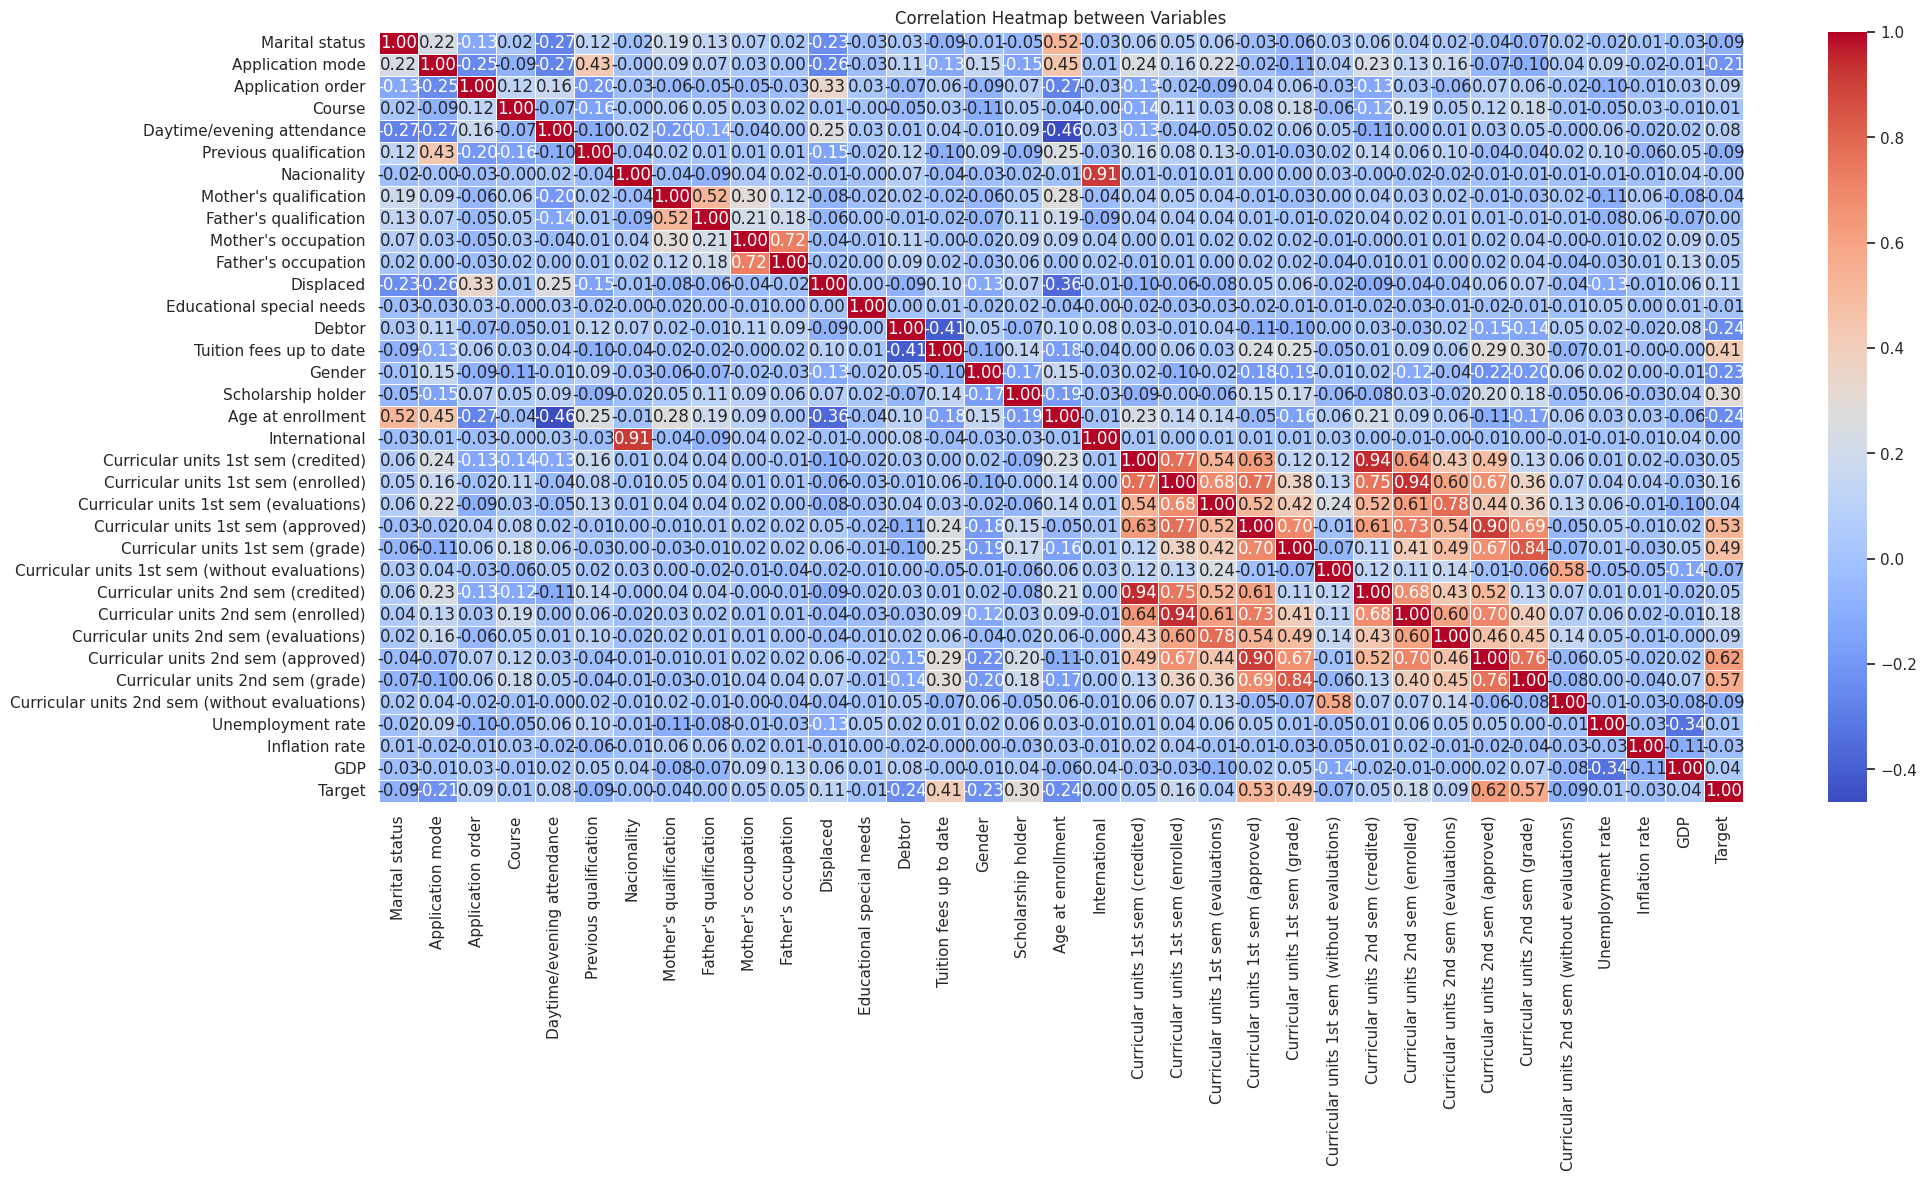

In [ ]:
#Para hacer una matriz de correlación la variable objetivo debe ser discreta.
#Asi que transformaremos clases en 0, 1, 2,
# 0 = abandono, 1 = graduado, 2 = inscrito

#importamos librerias
from sklearn.preprocessing import LabelEncoder
#Seleccionamos el Encoder
label_encoder = LabelEncoder()
#Convertimos nuestras clases a discretos.
df["Target"] = label_encoder.fit_transform(df["Target"])

#Establecemos tamaño de la figura
plt.figure(figsize=(22, 10))
#Establecemos titulo
plt.title('Correlation Heatmap between Variables')
#Generamos el mapa de correlacion
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

Lo que se puede observar a continuación es la correlación lineal entre todos los atributos, incluyendo la variable objetivo
.

Haciendo una análisis profundo de este mapa de calor se pueden inferir varias cosas.





1. La relación entre Nacionality
 y
 International
, son 2 atributos que dan la nacionalidad del estudiante y si vienen de otro país, por lo que es esperada esta relación en donde todos aquellos que no son del mismo país sean extranjeros.

2. Las variables de "Curricular" están fuertemente relacionadas entre ellas, esto debido al patron
 de comportamiento de los estudiantes respecto a su desempeño académico, es por ello que las calificaciones, cursos acreditados del primer semestre tengan alta relación lineal con todos los atributos homólogos del segundo semestre.

3. Los cursos no tienen una relación entre ellos y la variable objetivo
 a pesar de haber observado que algunos cursos tiene más desertores que otros.

4. Solo 2 atributos tienen peso para determinar el resultado de "Abandona" o "Graduado", las cuales son: "Curricular units
 2nd
 sem
 (approved
) y Curricular units
 2nd
 sem
 (grade)". Esta relación tiene todo el sentido del mundo, ya que las últimas calificaciones y unidades aprobadas van a determinar si el estudiante se va a graduar o no.

#Modelado automatizado

Dada la naturaleza de las redes bayesianas es de vital importancia tener un experto del dominio para generar las relaciones entre atributos, también se puede optar por usar aprendizaje por estructura y parámetros para generar una red bayesiana de manera automática, es por ello que la selección de atributos y extracción de características no aplica para este modelo.

##Importar librerias

In [ ]:
%pip install tabulate
import pandas as pd
import matplotlib.pyplot as plt
%pip install numpy==1.26.2
import numpy as np
!pip install bnlearn
print(np.__version__)

In [ ]:
import bnlearn as bn
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, average_precision_score, f1_score, recall_score
from sklearn.feature_selection import mutual_info_classif
import warnings
warnings.filterwarnings("ignore")

##Creación del DAG

Un DAG (Directed Acyclic Graph, en inglés) se traduce como Grafo Dirigido Acíclico. Es un tipo de estructura de datos que consiste en un conjunto de nodos (o vértices) conectados entre sí por arcos dirigidos, de tal manera que no forman ciclos cerrados

In [ ]:
#Debido a que solo nos interesa determinar los estudiantes que abandonan y los que se graduan
#Quitaremos todos los datos que tengan aquellas instancias de inscritos
df = df[df.Target!=2]
#Observemos el dataframe
df.head()

#Recodemos que
#1 = Graduado
#0 = Abandono

Marital status  Application mode  Application order  Course  \
0               1                 8                  5       2   
1               1                 6                  1      11   
2               1                 1                  5       5   
3               1                 8                  2      15   
4               2                12                  1       3   

   Daytime/evening attendance  Previous qualification  Nacionality  \
0                           1                       1            1   
1                           1                       1            1   
2                           1                       1            1   
3                           1                       1            1   
4                           0                       1            1   

   Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                      13                      10                    6  ...   
1                       1                       3                    4  ...   
2                      22                      27                   10  ...   
3                      23                      27                    6  ...   
4                      22                      28                   10  ...   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                    0                                    0   
1                                    0                                    6   
2                                    0                                    6   
3                                    0                                    6   
4                                    0                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP  Target  
0             1.4  1.74       0  
1            -0.3  0.79       1  
2             1.4  1.74       0  
3            -0.8 -3.12       1  
4            -0.3  0.79       1  

[5 rows x 35 columns]

La librería bnlearn en Python proporciona herramientas para construir, aprender, y analizar redes bayesianas.

Por lo que usaremos bnlearn para crear un DAG por medio del aprendizaje de estructuras con el método "Hillclimbsearch".

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


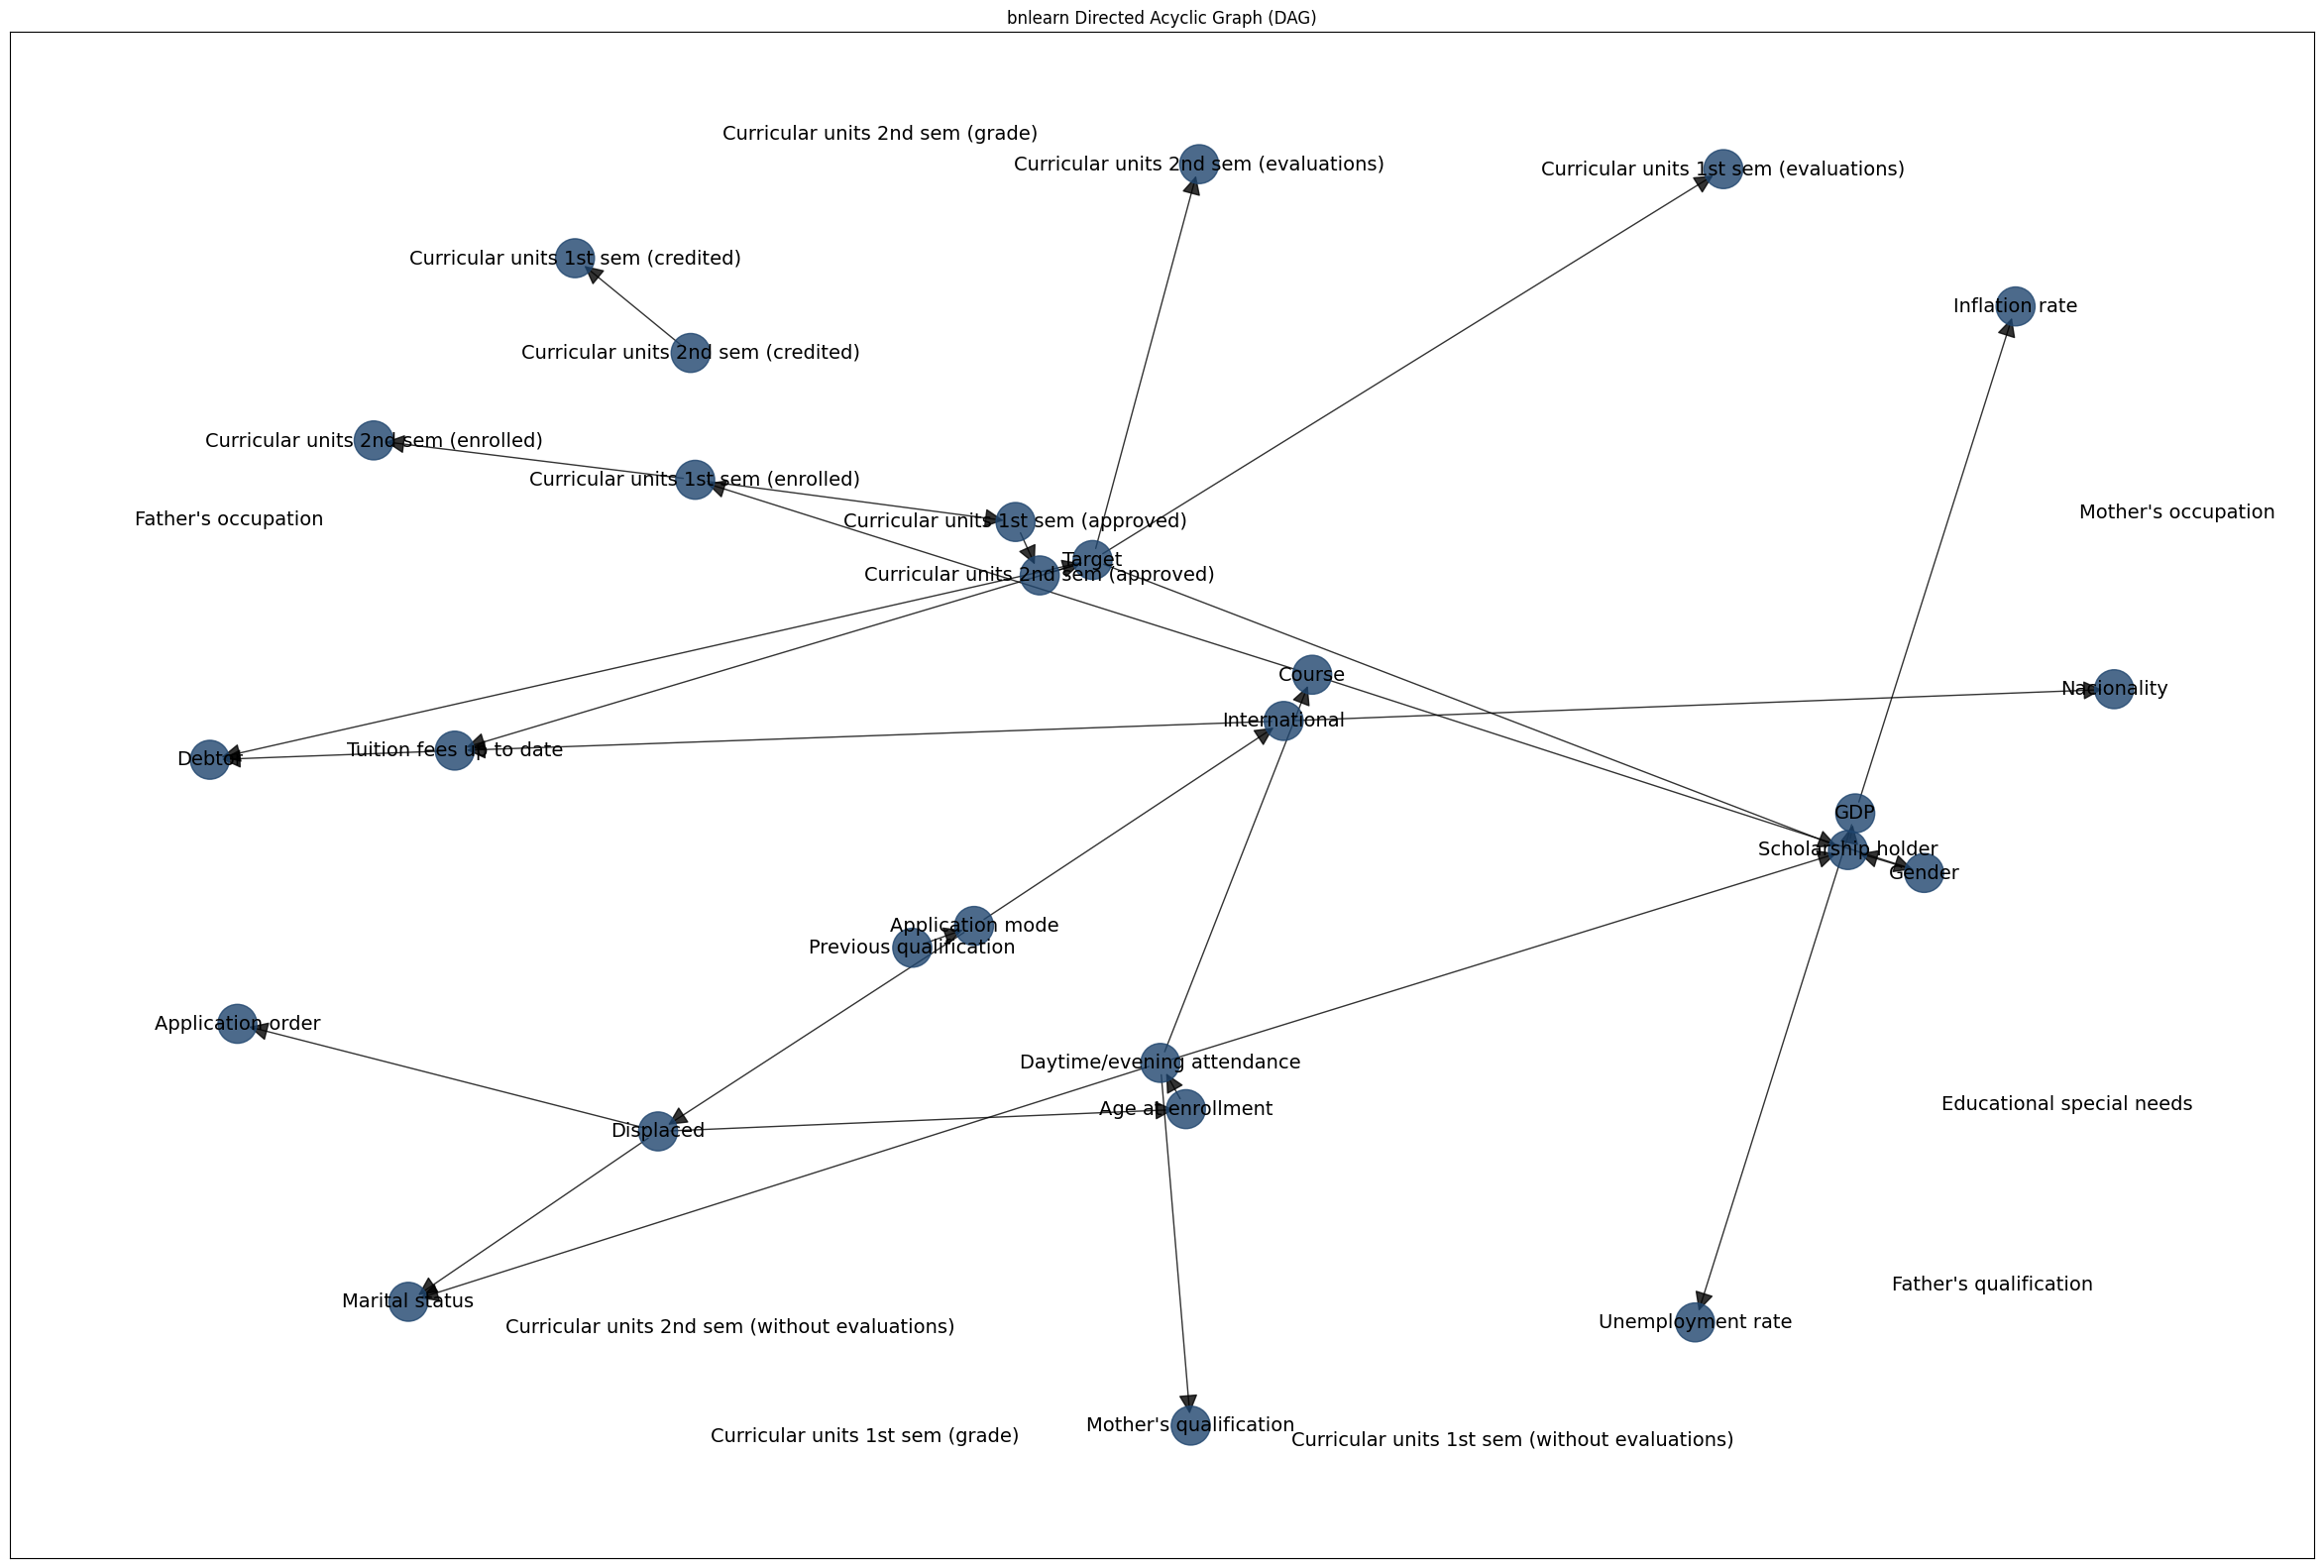

In [ ]:
#Establecemos un DAG dado un dataframe, aprendiendo con hillclimbing, con el nodo raiz "Target"
DAG = bn.structure_learning.fit(df, methodtype='hc', root_node="Target", verbose=3)

#Imprimios el DAG
G = bn.plot(DAG, params_static = {'width':30, 'height':20, 'alpha':0.8})

Esta es grafo dirigido acíclico que genera por este método, con este grafo podemos ajustarlo para que tenga sus tablas de probabilidad como una red bayesiana.

##Ajustar el DAG con los datos para generar las tablas de probabilidad.

Teniendo ya el DAG podemos generar el aprendizaje por medio del "Maximum Likelihood Estimation" el cual es un método utilizado para estimar los parámetros de un modelo estadístico. El objetivo del MLE es encontrar los valores de los parámetros que maximizan la verosimilitud de los datos observados, asumiendo un modelo estadístico específico.




[bnlearn] >Parameter learning> Computing parameters using [ml]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of Application mode:
+------------------------+-----+----------------------------+
| Previous qualification | ... | Previous qualification(17) |
+------------------------+-----+----------------------------+
| Application mode(1)    | ... | 0.0                        |
+------------------------+-----+----------------------------+
| Application mode(2)    | ... | 0.0                        |
+------------------------+-----+----------------------------+
| Application mode(3)    | ... | 0.0                        |
+------------------------+-----+----------------------------+
| Application mode(4)    | ... | 0.8333333333333334         |
+------------------------+-----+----------------------------+
| Application mode(5)    | ... | 0.0                        |
+------------------------+---

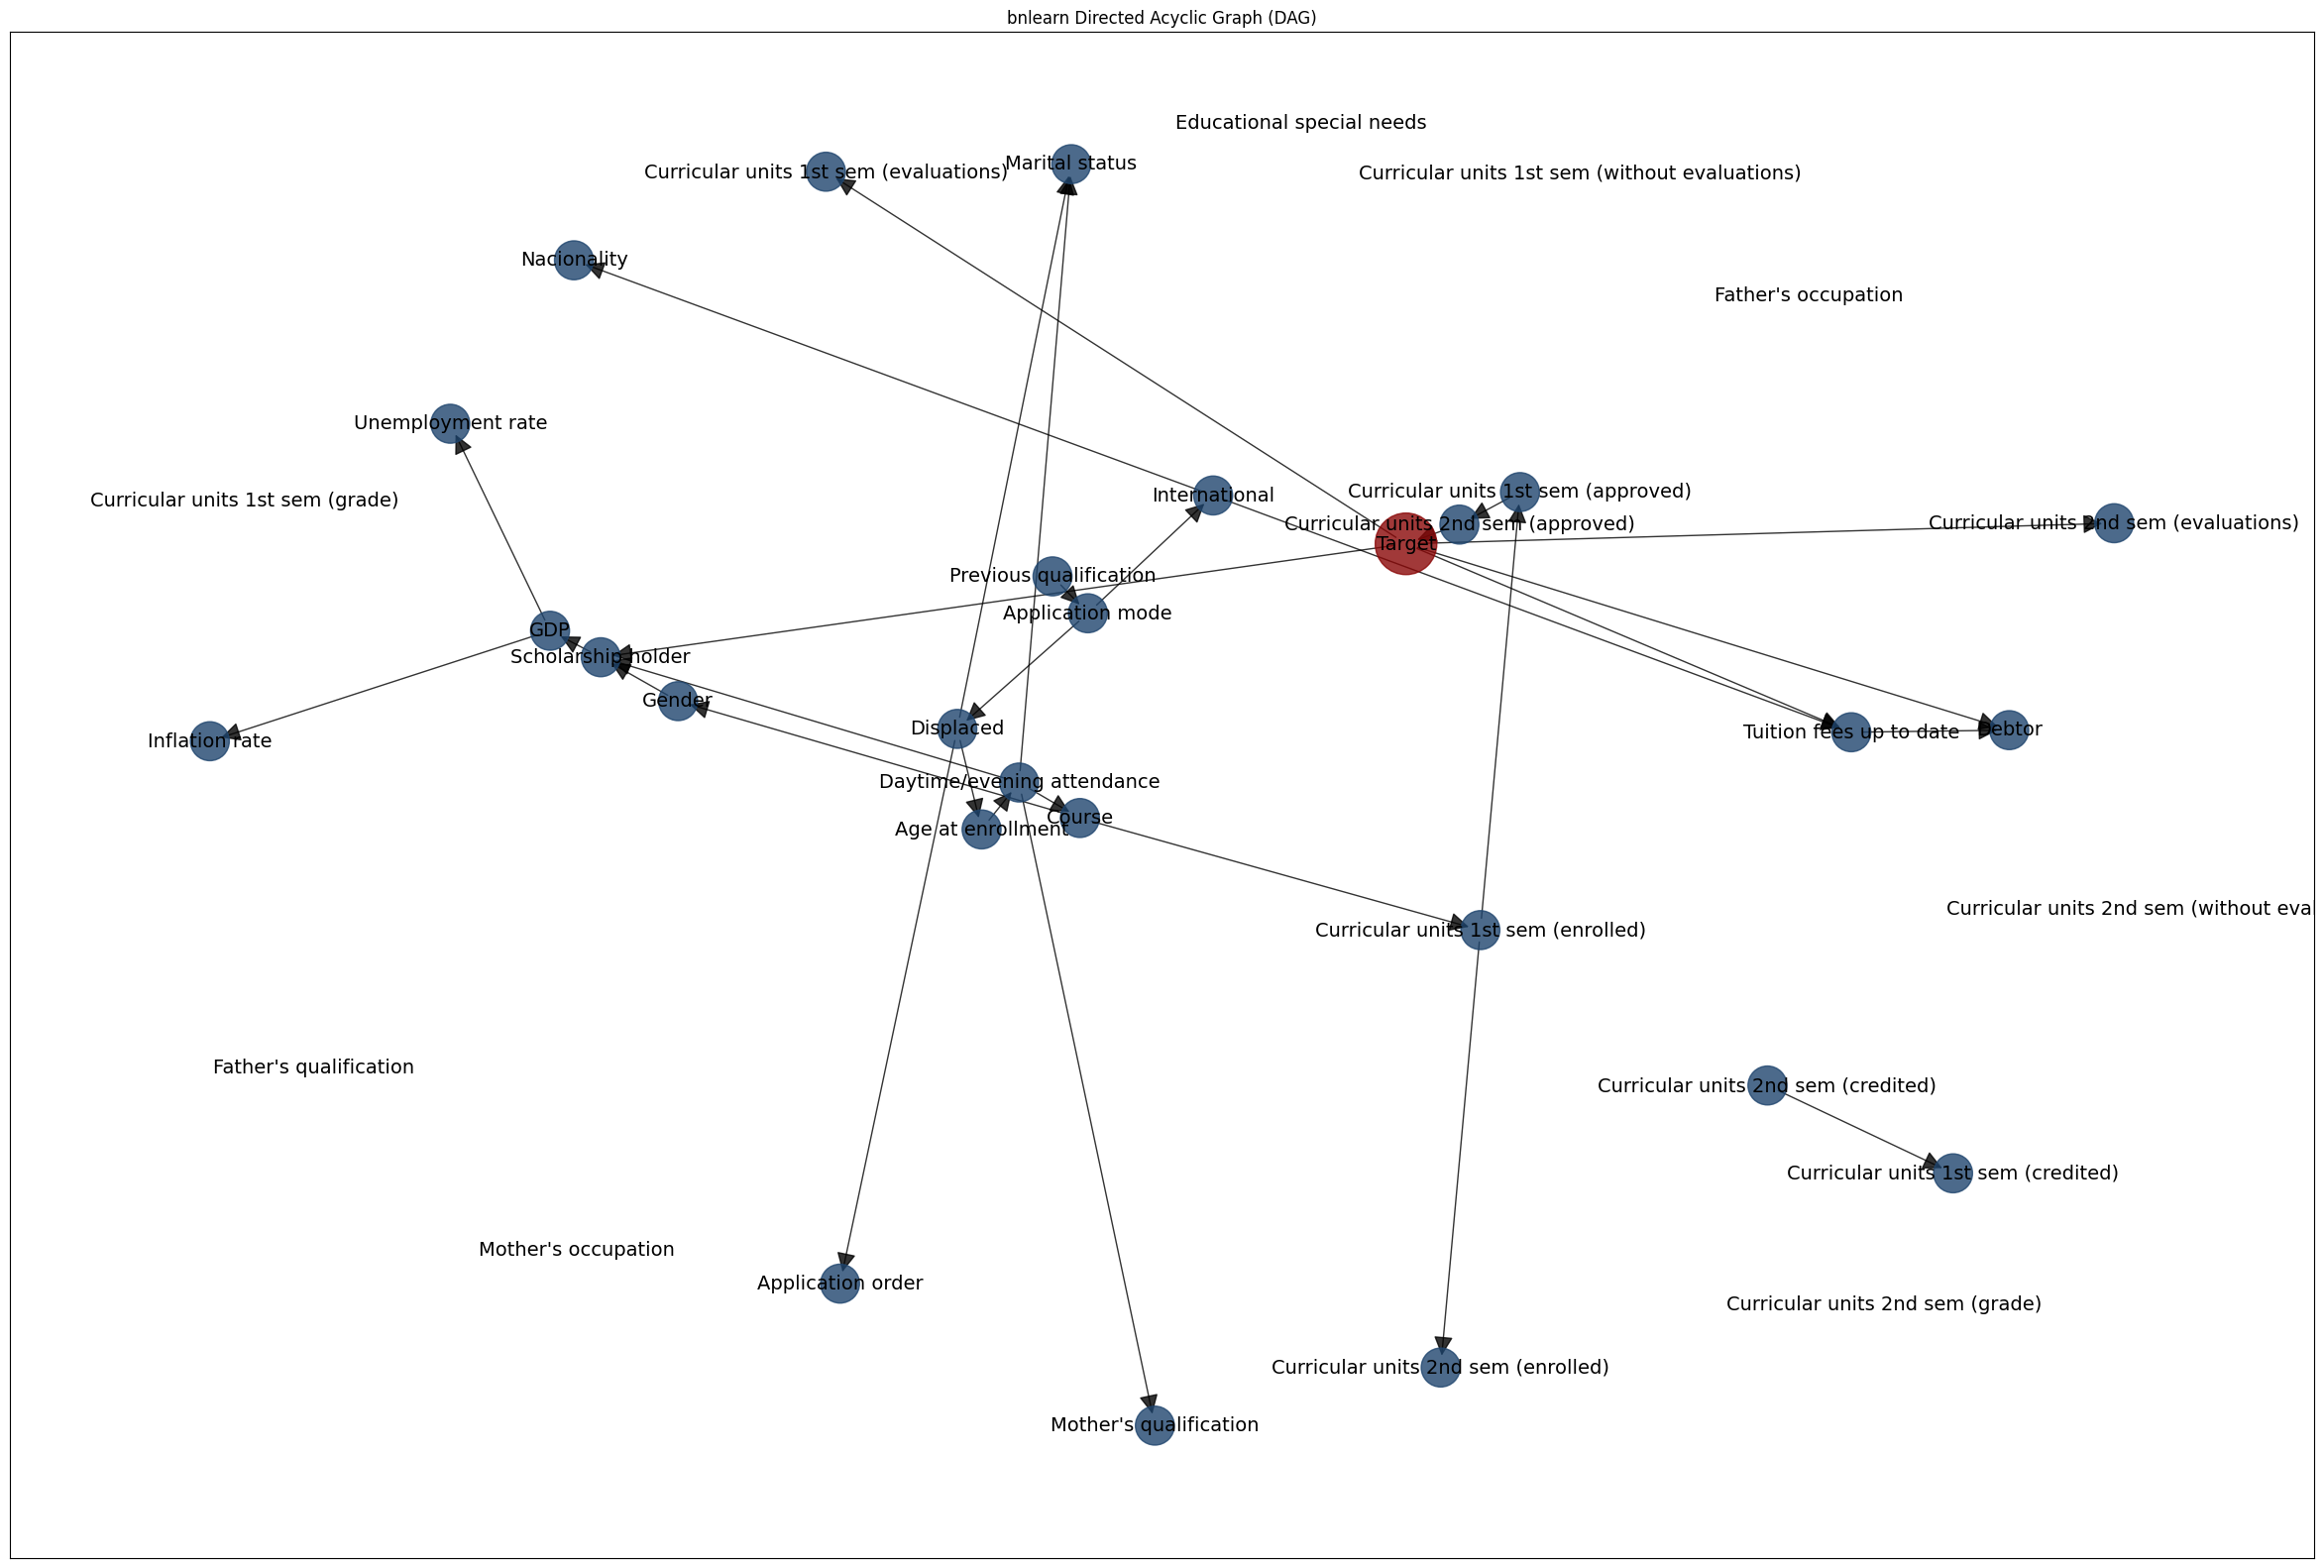

In [ ]:
#Establecemos el aprendizaje por medio de MLE, para crear la red bayesiana
model = bn.parameter_learning.fit(DAG, df, verbose=3,  methodtype='ml')

#Establecemos lso parametros para el grafico
node_properties = bn.get_node_properties(model)
node_properties["Target"]["node_color"] = "#8A0707"
node_properties["Target"]["node_size"] = 2000

#Imprimimos el DAG pero ya con las tablas de probabilidad de cada nodo.
G = bn.plot(model, node_properties=node_properties, params_static = {'width':30, 'height':20, 'alpha':0.8})

##Observando los nodos y su relación

In [ ]:
#Creamos un modelo extra
model1 = bn.independence_test(model, df, alpha=0.05, prune=False)

#Imprimimos de manera tabular la relación entre variables
print(tabulate(model1['independence_test'], headers="keys"))

[bnlearn] >Compute edge strength with [chi_square]
    source                               target                                  stat_test         p_value    chi_square    dof
--  -----------------------------------  --------------------------------------  -----------  ------------  ------------  -----
 0  Application mode                     Displaced                               True         4.35553e-127      649.61       17
 1  Application mode                     International                           True         1.60675e-183      914.612      17
 2  Displaced                            Marital status                          True         4.53132e-60       287.645       5
 3  Displaced                            Application order                       True         1.56755e-118      563.704       6
 4  Displaced                            Age at enrollment                       True         2.34393e-106      640.837      45
 5  International                        Nacionality 

Como se puede observar, solo una variable tiene una arista con el "Target" por lo que nuestra red bayesiana solo considero esa relación, pues como se pudo ver en la correlación lineal "Curricular units 2nds sem(approved)" era la más fuerte con los atributos "Target".

Tambien podemos observar de "Target" salen 5 aristas hacia otros nodos pues determinando si un estudiante abandona o se gradua se predicen estos atributos.

Por otro lado, es importante tener en cuenta que tener un valor p menor a 0.005 y un valor Chi-Square alto, indican una fuerte relación dependiente entre las variables.

##Testing

Trabajar con bnlearn no permite hacer Test_train_split con sklearn, por lo que es necesario trabajar con las funciones de bn y métricas de sklearn.

###Función de evaluación

In [ ]:
#Función de evaluación
def get_metricas(model, df, col):

  pred = bn.predict(model, df, variables=[col])
  #print(pred)
  acc = accuracy_score(df[col], pred[col])
  pre = average_precision_score(df[col], pred[col])
  f1 = f1_score(df[col], pred[col])
  rec = recall_score(df[col], pred[col])

  print("\n Accuracy -", acc)
  print("\n Precision -",  pre)
  print("\n F1 -", f1)
  print("\n Recall -", rec)


##Resultados

Primero obtenemos un muestreo del modelo, con la función sampling con un n=100.

In [ ]:
Xtest = bn.sampling(model, n=4000)

[datazets] >WARNING> Probability values don't exactly sum to 1. Differ by: 1.1102230246251565e-16. Adjusting values.
[datazets] >WARNING> Probability values don't exactly sum to 1. Differ by: 1.1102230246251565e-16. Adjusting values.
[datazets] >WARNING> Probability values don't exactly sum to 1. Differ by: -2.220446049250313e-16. Adjusting values.
[datazets] >WARNING> Probability values don't exactly sum to 1. Differ by: 1.1102230246251565e-16. Adjusting values.
[datazets] >WARNING> Probability values don't exactly sum to 1. Differ by: -2.220446049250313e-16. Adjusting values.
[datazets] >WARNING> Probability values don't exactly sum to 1. Differ by: 1.1102230246251565e-16. Adjusting values.
[datazets] >WARNING> Probability values don't exactly sum to 1. Differ by: 1.1102230246251565e-16. Adjusting values.
[datazets] >WARNING> Probability values don't exactly sum to 1. Differ by: -2.220446049250313e-16. Adjusting values.
[datazets] >WARNING> Probability values don't exactly sum to 1. 

Ahora usamos las función "get_metricas"

In [ ]:
get_metricas(model, Xtest, "Target")

[bnlearn]> Remaining columns for inference: 26


100%|██████████| 4000/4000 [00:28<00:00, 140.39it/s]



 Accuray - 0.9145

 Precision - 0.8978329617107667

 F1 - 0.9313804173354735

 Recall - 0.9508398197460057


#### Exactitud
La exactitud nos dice cuantas instancias clasifico correctamente respecto al número total de instancias, en este caso al tener un 91.45% inferimos que de 4000 instancias, 3658 fueron clasificadas correctamente.
(Estos datos pueden variar según cuando se ejecute)

###Precisión
La precisión es la métrica que nos dice cuantas instancias positivas eran realmente positivas.

En este caso solo el 89% de las instancias positivas fueron clasificadas correctamente. Por lo que 3560 de 4000 fueron bien predichas.


### F1

El f1 es especialmente útil cuando hay costos diferentes asociados con falsos positivos y falsos negativos, ya que trata de equilibrar estos dos tipos de errores. Sin embargo, también tiene sus limitaciones y puede no ser la mejor opción en todos los contextos.

Por lo que un 93% de F1 score nos indica que hay una buena precisión y sensibilidad.

###Recuerdo

 El recuerdo es una métrica que mide la capacidad de un modelo para identificar todos los casos positivos en un conjunto de datos.
 En este caso, el recuerdo es de 95% indicando identifica la mayor de las instancias positivas y no tiene falsos negativos.

###Matriz de confusión

[bnlearn]> Remaining columns for inference: 26


100%|██████████| 4000/4000 [00:29<00:00, 136.81it/s]


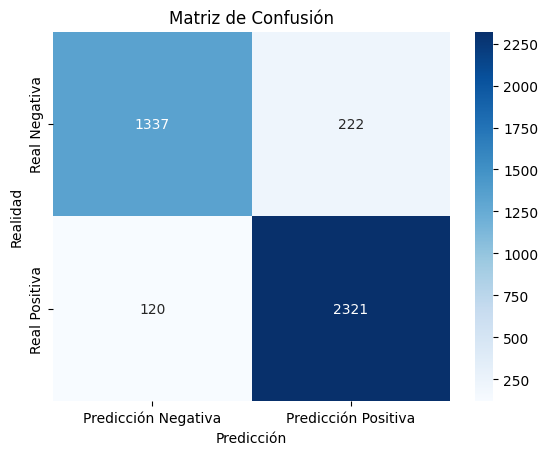

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

pred = bn.predict(model, Xtest, variables=["Target"])

cm = confusion_matrix(Xtest["Target"], pred["Target"])

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicción Negativa', 'Predicción Positiva'],
            yticklabels=['Real Negativa', 'Real Positiva'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

Es importante tener en cuenta las métricas y sobre todo en un tema tan sensible como el abandono escolar, ya que es fundamental detectar aquellos alumnos potenciales a desertar y no solo a los que no lo harán.

Como podemos observar en la matriz de confusión las predicciones reales negativas son bastante altas, pero tiene problemas para diferencias de que parecen que se graduaran pero desertan.

###CPD's

CPD (Conditional Probability Distribution) en el contexto de las redes bayesianas se refiere a la distribución de probabilidad condicional asociada con un nodo en la red. En una red bayesiana, un CPD describe cómo la probabilidad de un nodo depende de sus nodos padres en el grafo.

In [ ]:
CPD = bn.print_CPD(model, verbose=0)
CPD["Target"]

Target  Curricular units 2nd sem (approved)         p
0        0                                    0  0.906484
1        0                                    1  1.000000
2        0                                    2  0.958678
3        0                                    3  0.788820
4        0                                    4  0.440945
5        0                                    5  0.209139
6        0                                    6  0.073818
7        0                                    7  0.066202
8        0                                    8  0.065359
9        0                                    9  0.240000
10       0                                   10  0.312500
11       0                                   11  0.113636
12       0                                   12  0.218750
13       0                                   13  0.047619
14       0                                   14  0.000000
15       0                                   16  1.000000
16       0                                   17  0.000000
17       0                                   18  0.000000
18       0                                   19  0.000000
19       0                                   20  0.000000
20       1                                    0  0.093516
21       1                                    1  0.000000
22       1                                    2  0.041322
23       1                                    3  0.211180
24       1                                    4  0.559055
25       1                                    5  0.790861
26       1                                    6  0.926182
27       1                                    7  0.933798
28       1                                    8  0.934641
29       1                                    9  0.760000
30       1                                   10  0.687500
31       1                                   11  0.886364
32       1                                   12  0.781250
33       1                                   13  0.952381
34       1                                   14  1.000000
35       1                                   16  0.000000
36       1                                   17  1.000000
37       1                                   18  1.000000
38       1                                   19  1.000000
39       1                                   20  1.000000

Esta es la tabla de probabilidades para determinar si un alumno abandonará sus estudios o no con el único atributo "Curricular units
 2nd
 sem
 (approved
)".

#Modelo por un no experto

Por el momento no se tiene con un experto del área para determinar que variables son prescindibles para hacer esta predicción, sin embargo, con los valores que arrojaron el test de independencia y la matriz de correlación se puede inferir en el siguiente modelo propuesto:

[bnlearn] >bayes DAG created.
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


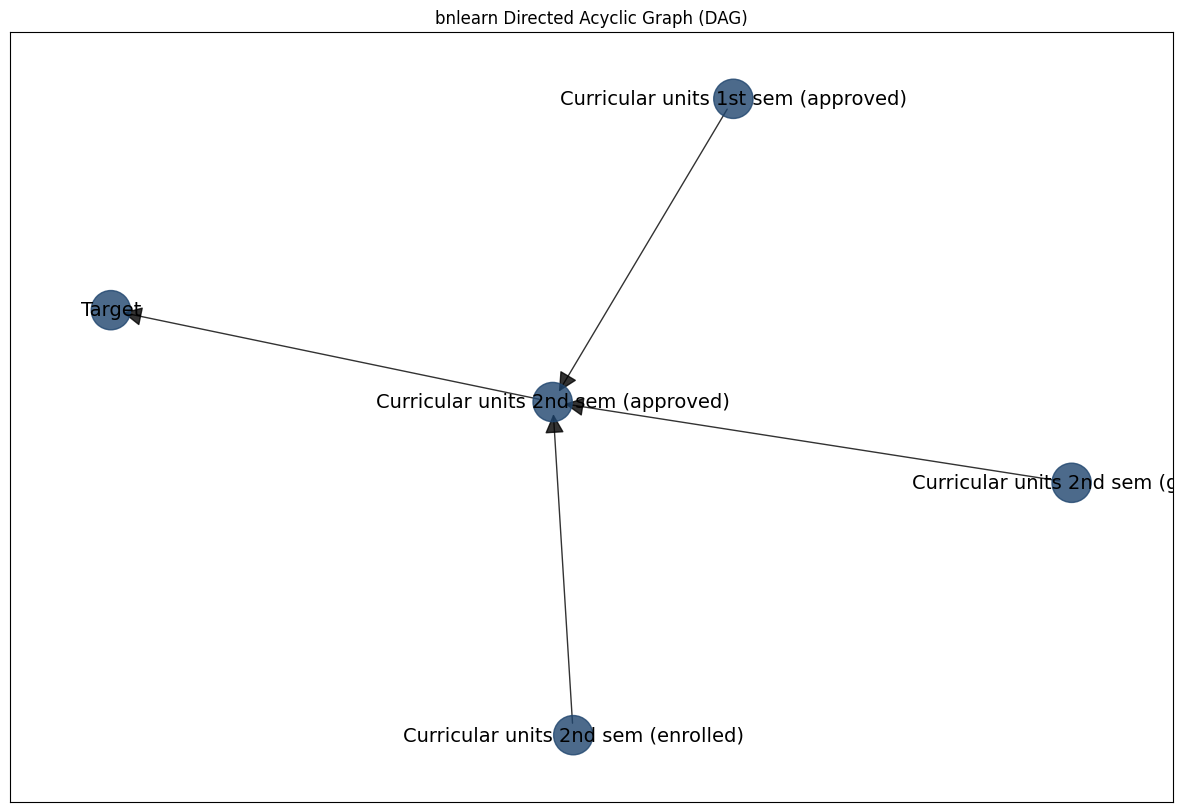

In [ ]:
#Creamos las relaciones
edges = [("Curricular units 2nd sem (approved)", "Target"),
         ("Curricular units 1st sem (approved)", "Curricular units 2nd sem (approved)"),
         ("Curricular units 2nd sem (grade)", "Curricular units 2nd sem (approved)"),
         ("Curricular units 2nd sem (enrolled)", "Curricular units 2nd sem (approved)")]

#Establecemos el DAG
DAG2 = bn.make_DAG(edges)

#Imprimimos el DAG
G = bn.plot(DAG2)

Como se puede observar, ahora se tienen otros 3 nodos alimentando el principal que usaba el modelo anterior, haciéndolo más robusto.

##Aprendizaje con MLE

In [ ]:
#Ajustamos el DAG para hacer una red bayesiana
model2 = bn.parameter_learning.fit(DAG2, df,  methodtype='ml')

[bnlearn] >Removing columns from dataframe to make consistent with DAG [['Marital status' 'Application mode' 'Application order' 'Course'
 'Daytime/evening attendance' 'Previous qualification' 'Nacionality'
 "Mother's qualification" "Father's qualification" "Mother's occupation"
 "Father's occupation" 'Displaced' 'Educational special needs' 'Debtor'
 'Tuition fees up to date' 'Gender' 'Scholarship holder'
 'Age at enrollment' 'International' 'Curricular units 1st sem (credited)'
 'Curricular units 1st sem (enrolled)'
 'Curricular units 1st sem (evaluations)'
 'Curricular units 1st sem (grade)'
 'Curricular units 1st sem (without evaluations)'
 'Curricular units 2nd sem (credited)'
 'Curricular units 2nd sem (evaluations)'
 'Curricular units 2nd sem (without evaluations)' 'Unemployment rate'
 'Inflation rate' 'GDP']]
[bnlearn] >Parameter learning> Computing parameters using [ml]
[bnlearn] >CPD of Curricular units 2nd sem (approved):
+-----------------------------------------+-----+
| Cu

##Resultados


Primero obtenemos un muestreo.

In [ ]:
Xtest2 = bn.sampling(model2, n=4000)

[datazets] >WARNING> Probability values don't exactly sum to 1. Differ by: 1.1102230246251565e-16. Adjusting values.
[datazets] >WARNING> Probability values don't exactly sum to 1. Differ by: 2.220446049250313e-16. Adjusting values.
[datazets] >WARNING> Probability values don't exactly sum to 1. Differ by: 1.1102230246251565e-16. Adjusting values.
[datazets] >WARNING> Probability values don't exactly sum to 1. Differ by: 1.1102230246251565e-16. Adjusting values.
[datazets] >WARNING> Probability values don't exactly sum to 1. Differ by: 1.1102230246251565e-16. Adjusting values.
[datazets] >WARNING> Probability values don't exactly sum to 1. Differ by: 1.1102230246251565e-16. Adjusting values.
[datazets] >WARNING> Probability values don't exactly sum to 1. Differ by: 1.1102230246251565e-16. Adjusting values.
[datazets] >WARNING> Probability values don't exactly sum to 1. Differ by: -2.220446049250313e-16. Adjusting values.


Ahora, imprimimos las métricas.

In [ ]:
get_metricas(model2, Xtest2, "Target")

[bnlearn]> Remaining columns for inference: 4


100%|██████████| 2982/2982 [04:04<00:00, 12.17it/s]



 Accuray - 0.84375

 Precision - 0.7993503716103377

 F1 - 0.8736608045279967

 Recall - 0.944493006993007


Si bien, algunas de las métricas bajaron un poco, este modelo resulta ser más robusto pues se pueden hacer inferencias solo dando uno de los 4 datos, en el caso del modelo anterior solo podía recibir valores de un solo atributo para hacer la predicción, pues incluso el recuerdo se mantiene en un buen rango del 94%.

Observemos la matriz de confusión

[bnlearn]> Remaining columns for inference: 4


100%|██████████| 2982/2982 [03:07<00:00, 15.94it/s]


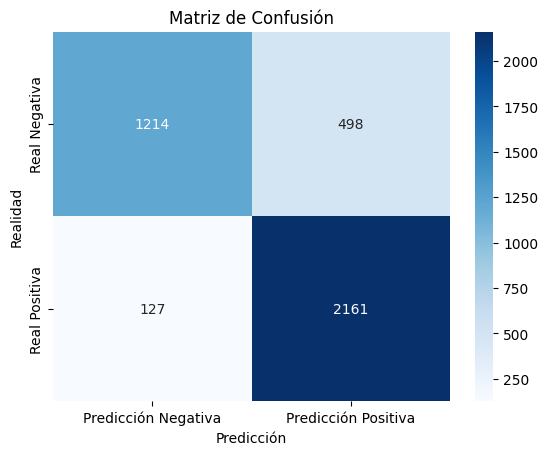

In [ ]:
pred = bn.predict(model2, Xtest2, variables=["Target"])

cm = confusion_matrix(Xtest2["Target"], pred["Target"])

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicción Negativa', 'Predicción Positiva'],
            yticklabels=['Real Negativa', 'Real Positiva'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

Lo que podemos observar es que empieza a fallar al clasificar aquellos que si iban a desertar, pero los clasifico como que si se graduaran, lo cual, es el problema per se, lo que se busca es identificar a los alumnos en riesgo de dejar sus estudios para aportarles ayuda temprana, sin embargo, este modelo es más robusto.

##CPD's

In [ ]:
CPD2 = bn.print_CPD(model2, verbose=0)

In [ ]:
CPD2["Curricular units 2nd sem (approved)"]

Curricular units 2nd sem (approved)  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   
...                                      ...   
7326875                                   20   
7326876                                   20   
7326877                                   20   
7326878                                   20   
7326879                                   20   

         Curricular units 1st sem (approved)  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   
...                                      ...   
7326875                                   26   
7326876                                   26   
7326877                                   26   
7326878                                   26   
7326879                                   26   

         Curricular units 2nd sem (enrolled)  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   
...                                      ...   
7326875                                   23   
7326876                                   23   
7326877                                   23   
7326878                                   23   
7326879                                   23   

         Curricular units 2nd sem (grade)     p  
0                                0.000000  1.00  
1                               10.000000  0.05  
2                               10.166667  0.05  
3                               10.200000  0.05  
4                               10.250000  0.05  
...                                   ...   ...  
7326875                         17.587500  0.05  
7326876                         17.600000  0.05  
7326877                         17.692308  0.05  
7326878                         17.714286  0.05  
7326879                         18.571429  0.05  

[7326880 rows x 5 columns]

Si bien, la tabla de CPDS es similar, varian sus probabilidades dado a que es un modelo diferente.

#Pruebas sintéticas

Podemos hacer inferencia sobre los 2 modelos con datos sintéticos, en el caso del primer modelo solo podemos dar como entrada un solo dato.

In [ ]:
q1 = bn.inference.fit(model, variables=["Target"],
    evidence={"Curricular units 2nd sem (approved)": 3 })

[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+----------+---------+
|    |   Target |       p |
+====+==========+=========+
|  0 |        0 | 0.78882 |
+----+----------+---------+
|  1 |        1 | 0.21118 |
+----+----------+---------+


In [ ]:
q2 = bn.inference.fit(model2, variables=["Target"],
    evidence={"Curricular units 1st sem (approved)": 0,
              "Curricular units 2nd sem (approved)": 4,
              "Curricular units 2nd sem (enrolled)": 6})

[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+----------+----------+
|    |   Target |        p |
+====+==========+==========+
|  0 |        0 | 0.440945 |
+----+----------+----------+
|  1 |        1 | 0.559055 |
+----+----------+----------+


Aquí podemos observar como al primer modelo solo se le puede darle un valor de entrada para hacer esta inferencia.

Por otro lado, el segundo modelo permite la entrada hasta de 4 atributos, lo cual permite una mayor cobertura de posibilidades por ende un modelo más robusto y capaz de hacer predicciones con problemas más complejos.

#Conclusión


Considero que esta proyecto
 ha sido de gran utilidad para comprender a una mayor profundidad el problema que involucra el abandono escolar, ya que es un problema multifactorial que afecta a todo el mundo. Entender la base de datos y observar las correlaciones que se forman entre todos los atributos es de suma importancia, al mismo tiempo, los método de aprendizaje de estructuras puede determinar la generación de un grafo con la información dada.

Si bien, el método automático solo crea un grafo que solo un nodo está conectado a la variable objetivo, por lo que no genera una "red" como tal, pues el método no considero que fueran relevantes otras variables. Aun así se tuvieron resultados bastantes aceptables.

En el caso de la red bayesiana creada por mí, no como un experto del tema, pero analizando los datos obtenidos, obtuve resultados bastantes similares, sin embargo, algo que es considerablemente mejor es que ahora no solo depende de una sola variable, sino de 4 en total, entre ellas, variables del primer semestre, por lo que se puede hacer esta detección temprana con sus tablas de probabilidades, lo cual es lo que se busca, un sistema que permita tomar decisiones a los tutores con la información que tienen disponible.

Otro punto importante a tener en cuenta es que para las pruebas no se pudo separar un conjunto de datos para prueba y otro para entrenamiento, esto por las limitantes de la librería que se estaba usando, aun así, se usaron largos conjuntos de muestras para generalizar el entrenamiento.

También es importante mencionar el hecho de que no usaron otros modelos como punto de comparación debido a que lo más destacable de las redes bayesianas es sus tablas de probabilidad, su explicabilidad
 y robustez, por lo que sé si les compara con los métodos tradicionales o profundos, solo se compararía su eficacia, no su interpretabilidad, en lo cual se basa este proyecto como tal.

En resumen, determino que este proyecto es de utilidad y nutre el conocimiento en el área de la ciencia de datos en la educación.